In [58]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import cross_val_score,train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score

# Load dataset

In [59]:
df = pd.read_csv("Fraud_check.csv")
df.head()

,Undergrad,Marital.Status,Taxable.Income,City.Population,Work.Experience,Urban
0,NO,Single,68833,50047,10,YES
1,YES,Divorced,33700,134075,18,YES
2,NO,Married,36925,160205,30,YES
3,YES,Single,50190,193264,15,YES
4,NO,Married,81002,27533,28,NO


# Data preprocessing

In [60]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 600 entries, 0 to 599
Data columns (total 6 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Undergrad        600 non-null    object
 1   Marital.Status   600 non-null    object
 2   Taxable.Income   600 non-null    int64 
 3   City.Population  600 non-null    int64 
 4   Work.Experience  600 non-null    int64 
 5   Urban            600 non-null    object
dtypes: int64(3), object(3)
memory usage: 28.2+ KB


In [61]:
df.describe()

,Taxable.Income,City.Population,Work.Experience
count,600.000000,600.000000,600.000000
mean,55208.375000,108747.368333,15.558333
std,26204.827597,49850.075134,8.842147
min,10003.000000,25779.000000,0.000000
25%,32871.500000,66966.750000,8.000000
50%,55074.500000,106493.500000,15.000000
75%,78611.750000,150114.250000,24.000000
max,99619.000000,199778.000000,30.000000


In [62]:
pd.isnull(df).sum()

Undergrad          0
Marital.Status     0
Taxable.Income     0
City.Population    0
Work.Experience    0
Urban              0
dtype: int64

In [63]:
df.shape

(600, 6)

In [64]:
#Rename the columns
df= df.rename(columns={"Marital.Status":"marital_status","Taxable.Income":"taxable_income","City.Population":"city_population","Work.Experience":"work_experience"})

In [65]:
df

,Undergrad,marital_status,taxable_income,city_population,work_experience,Urban
0,NO,Single,68833,50047,10,YES
1,YES,Divorced,33700,134075,18,YES
2,NO,Married,36925,160205,30,YES
3,YES,Single,50190,193264,15,YES
4,NO,Married,81002,27533,28,NO
...,...,...,...,...,...,...
595,YES,Divorced,76340,39492,7,YES
596,YES,Divorced,69967,55369,2,YES
597,NO,Divorced,47334,154058,0,YES
598,YES,Married,98592,180083,17,NO


D:\anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='taxable_income'>

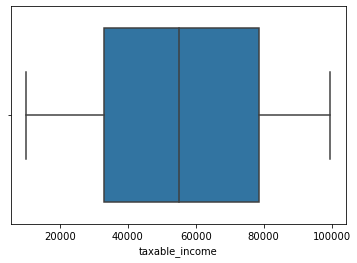

In [66]:
sns.boxplot(df.taxable_income)

In [67]:
#Splitting
def split(num):
    if num <30000:
        return  'Risky'
    else:
        return 'Good'
df.taxable_income=df.taxable_income.apply(split)

In [68]:
df

,Undergrad,marital_status,taxable_income,city_population,work_experience,Urban
0,NO,Single,Good,50047,10,YES
1,YES,Divorced,Good,134075,18,YES
2,NO,Married,Good,160205,30,YES
3,YES,Single,Good,193264,15,YES
4,NO,Married,Good,27533,28,NO
...,...,...,...,...,...,...
595,YES,Divorced,Good,39492,7,YES
596,YES,Divorced,Good,55369,2,YES
597,NO,Divorced,Good,154058,0,YES
598,YES,Married,Good,180083,17,NO


In [69]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
df['Undergrad'] = le.fit_transform(df['Undergrad'])
df['marital_status'] = le.fit_transform(df['marital_status'])
df['Urban'] = le.fit_transform(df['Urban'])

In [70]:
df

,Undergrad,marital_status,taxable_income,city_population,work_experience,Urban
0,0,2,Good,50047,10,1
1,1,0,Good,134075,18,1
2,0,1,Good,160205,30,1
3,1,2,Good,193264,15,1
4,0,1,Good,27533,28,0
...,...,...,...,...,...,...
595,1,0,Good,39492,7,1
596,1,0,Good,55369,2,1
597,0,0,Good,154058,0,1
598,1,1,Good,180083,17,0


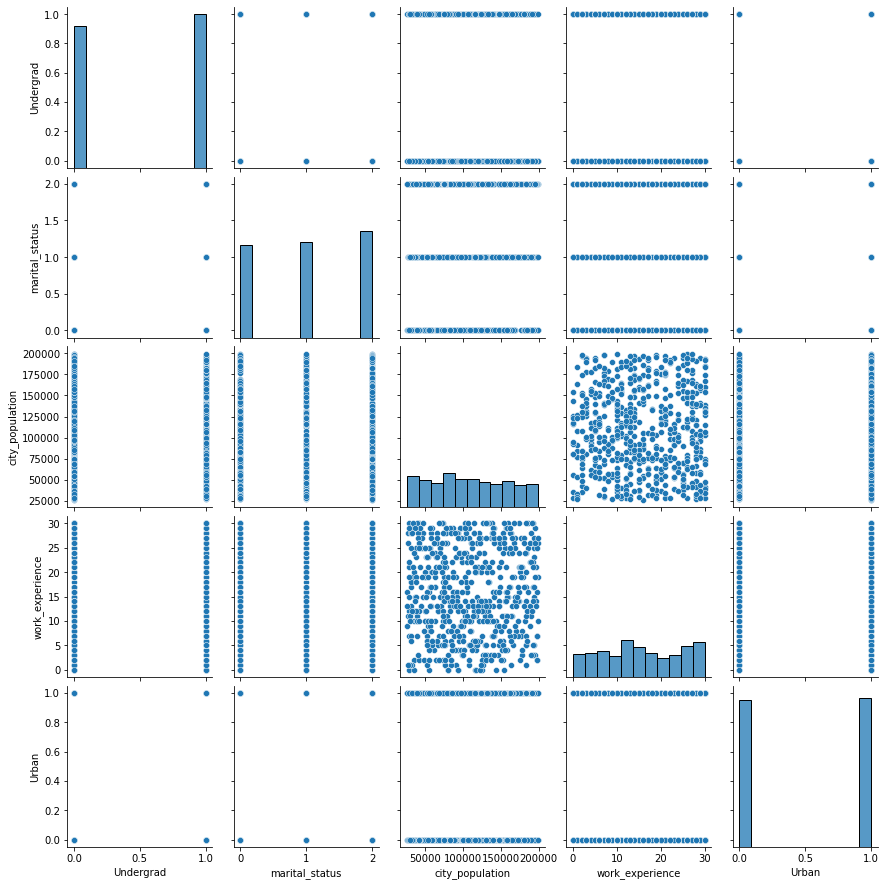

In [71]:
sns.pairplot(df)

In [72]:
df.corr()

,Undergrad,marital_status,city_population,work_experience,Urban
Undergrad,1.000000,0.042407,0.079579,-0.005362,-0.000267
marital_status,0.042407,1.000000,-0.001564,-0.002213,0.064562
city_population,0.079579,-0.001564,1.000000,0.013135,-0.040098
work_experience,-0.005362,-0.002213,0.013135,1.000000,-0.094559
Urban,-0.000267,0.064562,-0.040098,-0.094559,1.000000


<AxesSubplot:>

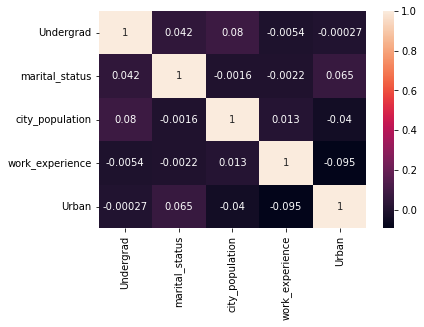

In [73]:
corr=df.corr()
sns.heatmap(corr,annot=True)

# Split features and target

In [45]:
x=df.iloc[:,df.columns!="taxable_income"]
y=df["taxable_income"]

In [46]:
x

,Undergrad,marital_status,city_population,work_experience,Urban
0,0,2,50047,10,1
1,1,0,134075,18,1
2,0,1,160205,30,1
3,1,2,193264,15,1
4,0,1,27533,28,0
...,...,...,...,...,...
595,1,0,39492,7,1
596,1,0,55369,2,1
597,0,0,154058,0,1
598,1,1,180083,17,0


In [47]:
y

0      Good
1      Good
2      Good
3      Good
4      Good
       ... 
595    Good
596    Good
597    Good
598    Good
599    Good
Name: taxable_income, Length: 600, dtype: object

# Train & Test Split

In [48]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.3,random_state=42)

In [49]:
x_train.shape,x_test.shape,y_train.shape,y_test.shape

((420, 5), (180, 5), (420,), (180,))

# Model Creation

In [50]:
model = RandomForestClassifier(n_estimators=10,criterion='entropy',oob_score=False)
model.fit(x_train,y_train)

RandomForestClassifier(criterion='entropy', n_estimators=10)

# Model validation

In [51]:
y_pred = model.predict(x_test)

In [52]:
confusion_matrix(y_test,y_pred)

array([[134,   9],
       [ 36,   1]], dtype=int64)

In [53]:
accuracy_score(y_test,y_pred)

0.75

In [54]:
pd.Series(y_pred).value_counts()

Good     170
Risky     10
dtype: int64

In [55]:
df=pd.DataFrame({"actual":y_test,"predicted":y_pred})
df

,actual,predicted
110,Risky,Good
419,Good,Good
565,Good,Good
77,Good,Risky
181,Risky,Good
...,...,...
54,Good,Good
493,Risky,Good
46,Good,Risky
93,Risky,Good


In [56]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

        Good       0.79      0.94      0.86       143
       Risky       0.10      0.03      0.04        37

    accuracy                           0.75       180
   macro avg       0.44      0.48      0.45       180
weighted avg       0.65      0.75      0.69       180

